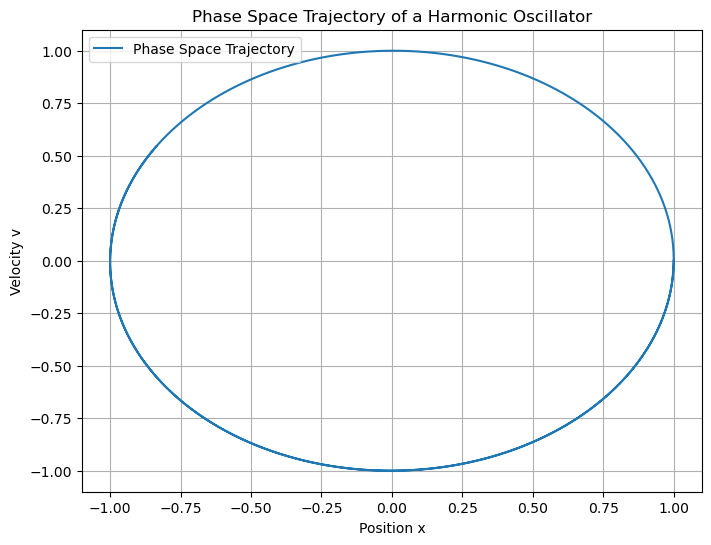

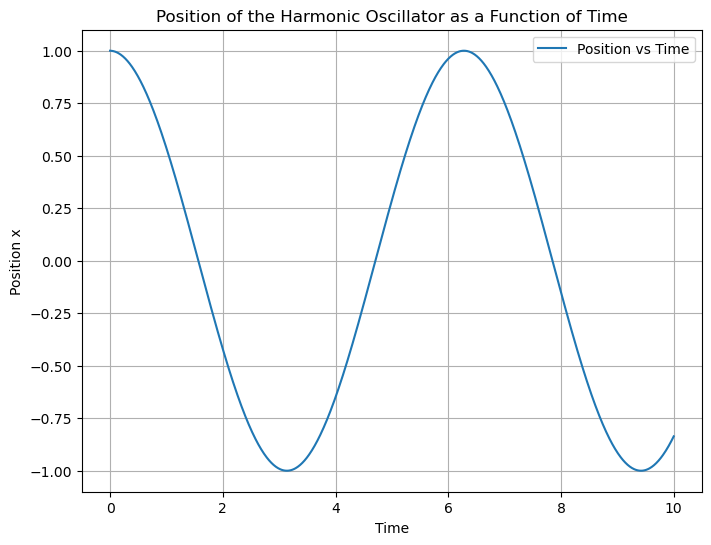

In [7]:
"""
Computational Chemistry: Molecular Simulations
Harmonic Oscillator and its Time Evolution in Phase Space

NOTE:
This model is a simple representation of a harmonic oscillator in one dimension. 
There are no external influences such as a solvent. Therefore, the dynamics can be 
thought of as occurring in a vacuum or an isolated environment. More complex environments,
like solvent effects, would require advanced methods and models which are not included 
in this basic representation.
"""

import numpy as np
import matplotlib.pyplot as plt

class HarmonicOscillator1D:
    def __init__(self, k=1.0, m=1.0, x0=1.0, v0=0.0):
        """Initialize the oscillator with given parameters."""
        self.k = k  # force constant
        self.m = m  # mass of the particle
        self.x = x0  # initial position
        self.v = v0  # initial velocity

    def compute_force(self):
        """Compute the force for the harmonic oscillator."""
        return -self.k * self.x

    def euler_step(self, dt):
        """Perform one step of Euler's method."""
        self.v += self.compute_force() / self.m * dt
        self.x += self.v * dt
        
    def time_evolution(self, dt, num_steps):
        """Simulate the time evolution using Euler's method for a given number of steps."""
        times = np.linspace(0, dt*num_steps, num_steps+1)
        x_values, v_values = [self.x], [self.v]
        
        for _ in range(num_steps):
            self.euler_step(dt)
            x_values.append(self.x)
            v_values.append(self.v)
        
        return times, x_values, v_values
    
    def plot_phase_space_trajectory(self, x_values, v_values):
        """Plot the phase space trajectory of the oscillator."""
        plt.figure(figsize=(8, 6))
        plt.plot(x_values, v_values, label='Phase Space Trajectory')
        plt.xlabel('Position x')
        plt.ylabel('Velocity v')
        plt.title('Phase Space Trajectory of a Harmonic Oscillator')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_position_vs_time(self, times, x_values):
        """Plot the position as a function of time."""
        plt.figure(figsize=(8, 6))
        plt.plot(times, x_values, label='Position vs Time')
        plt.xlabel('Time')
        plt.ylabel('Position x')
        plt.title('Position of the Harmonic Oscillator as a Function of Time')
        plt.legend()
        plt.grid(True)
        plt.show()

# Instantiate the Harmonic Oscillator and simulate its time evolution for a desired number of steps
oscillator = HarmonicOscillator1D()
times, x_values, v_values = oscillator.time_evolution(dt=0.01, num_steps=1000)  # Simulate for 1000 steps
oscillator.plot_phase_space_trajectory(x_values, v_values)
oscillator.plot_position_vs_time(times, x_values)


In [ ]:
class VelocityVerletMethod:
    @staticmethod
    def evolve(oscillator, dt, num_steps):
        times = np.linspace(0, dt*num_steps, num_steps+1)
        x_values, v_values = [oscillator.x], [oscillator.v]

        for _ in range(num_steps):
            # Half update of velocity
            a = oscillator.compute_force() / oscillator.m
            v_half = oscillator.v + 0.5 * dt * a

            # Update position
            oscillator.x += dt * v_half

            # Full update of velocity with new acceleration
            a_new = oscillator.compute_force() / oscillator.m
            oscillator.v = v_half + 0.5 * dt * a_new

            x_values.append(oscillator.x)
            v_values.append(oscillator.v)
        
        return times, x_values, v_values